In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import sidetable
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('attacks_todos.csv', index_col= 0)
df.head(1)

,Case Number,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Time,Species,Fatal (Y/N),Injury,Date
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018


# EJERCICIO 1: 
Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [3]:
plt.rcParams["figure.figsize"] = (30,8)

# EJERCICIO 2: 
Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

 - ##### 2.1: ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

In [4]:
df['Sex '] = df['Sex '].astype(str)
df['Country'] = df['Country'].astype(str)

<font color='teal'> Al hacer una gráfica con todos los países no se apreciaba nada en claro, por lo que la limitamos a los 10 países con más ataques de tiburones.</font>

In [5]:
cantidad_ataques = df['Country'].value_counts()[:10]
cantidad_ataques

USA                 2222
AUSTRALIA           1335
SOUTH AFRICA         577
PAPUA NEW GUINEA     134
NEW ZEALAND          127
BRAZIL               112
BAHAMAS              109
MEXICO                88
ITALY                 70
FIJI                  62
Name: Country, dtype: int64

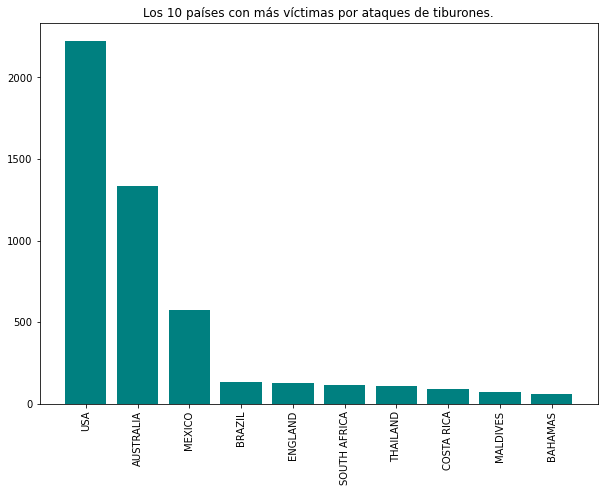

In [28]:
x= df['Country'].unique()[:10]
y = df['Country'].value_counts()[:10]

plt.figure()
plt.xticks(rotation='vertical')
plt.title('Los 10 países con más víctimas por ataques de tiburones.')
plt.bar(x,y, color ='teal')
plt.gcf().set_size_inches(10, 7)

plt.show()

 - ##### 2.2: Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

<font color='pink'> Primero hacemos un group by para ver los datos de los países y la cantidad de víctimas por sexo y poder compararlas luego con la grafíca.</font>

In [9]:
df_genero_pais = df.groupby(["Country", 'Sex '])['Sex '].count().sort_values(ascending=False)[:10]
df_genero_pais

Country           Sex 
USA               M       1787
AUSTRALIA         M       1104
SOUTH AFRICA      M        487
USA               F        336
AUSTRALIA         nan      141
PAPUA NEW GUINEA  M        108
NEW ZEALAND       M        100
USA               nan       97
BRAZIL            M         93
BAHAMAS           M         92
Name: Sex , dtype: int64

<font color='pink'> Con el método .unique() vemos que hay más tipos de sexos por lo que procedemos a reasignarlos como 'Unknown' para reflejarlos en la gráfica y que quede más clara.</font>

In [13]:
df['Sex '].unique()

array(['F', 'M', 'nan', 'M ', 'lli', 'N', '.'], dtype=object)

In [17]:
sexos = []

for value in df['Sex ']:
    if value == 'M':
        sexos.append('M')
    elif value == 'F':
        sexos.append('F')
    else:
        sexos.append('Unknown')

In [18]:
df['Sex_new'] = sexos

In [20]:
df.sample()

,Case Number,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Time,Species,Fatal (Y/N),Injury,Date,Sex_new
5444,1907.02.03,1907.0,Unprovoked,AUSTRALIA,Queensland,Ross Creek,Bathing,William Williams,M,18,Morning,NaN,Y,FATAL,03-Feb-1907,M


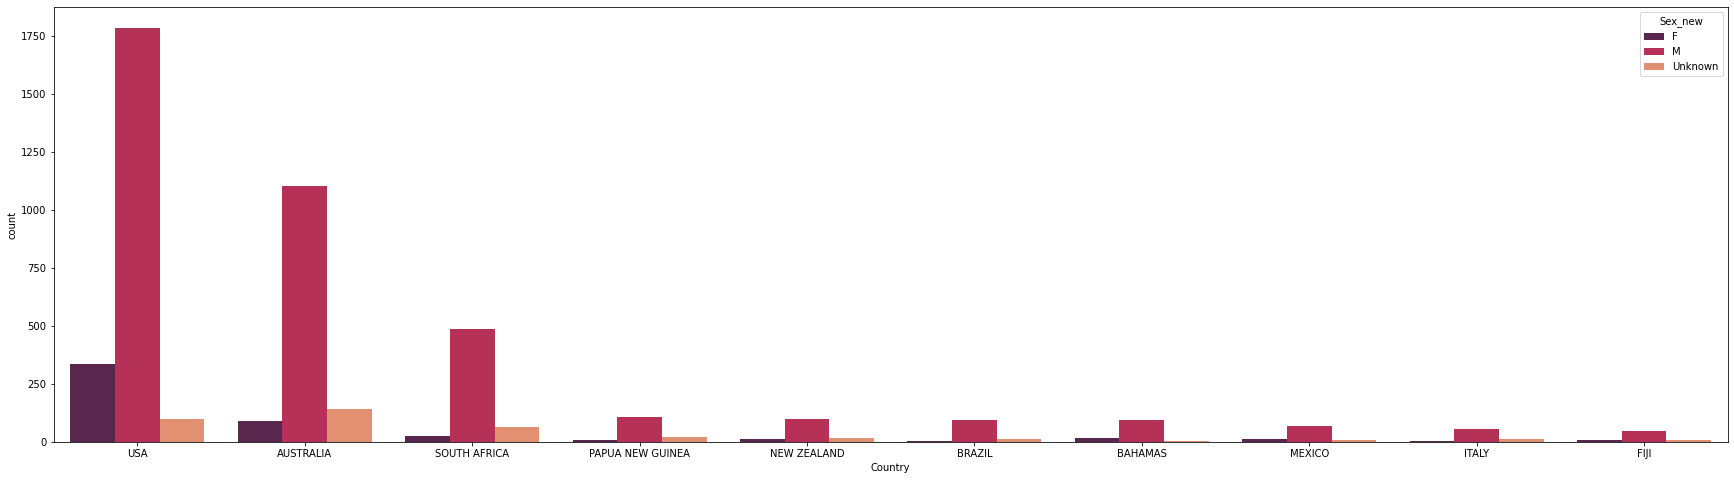

In [23]:
sns.countplot(x="Country", hue="Sex_new", data=df, palette="rocket",order=df.Country.value_counts().iloc[:10].index);

<font color='pink'> En esta gráfica podemos observar con claridad que la gran mayoría de víctimas en todos los páises han sido hombres.</font>

 ##### 2.3: ¿Qué edad recibe mayor número de ataques? 
   - 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. 

<font color='orange'> En este ejercicio nos enfrentamos al primer problema, los valores de la columna 'Age' son a la vez 'object' y float'. También contienen letras y símbolos. Para poder trabajar con esta columna y realizar las agrupaciones para la posterior gráfica primero tenemos que igualarlos.</font>

<font color='red'> Está la gráfica hecha pero hay que hacer los grupos de edades y no se puede hasta que consigamos cambiar la categoría de la columna y quitar lo que no sean números.</font>

In [ ]:
df['age_bins'] = pd.cut(df['Age'], 5, labels = ['grupo1', 'grupo2', 'grupo3', 'grupo4', 'grupo5'])

In [ ]:
df['bins_edad'] = pd.cut(df['Age'], bins=10)
df_bins_edad_group = df.groupby('bins_edad')
df_bins_edad_group_frec = df_bins_edad_group(frecuencia=('Age','count'))
print(df_bins_edad_group_frec)

In [ ]:
df['age_bins']= pd.cut(df['Age'], bins=10).value_counts()

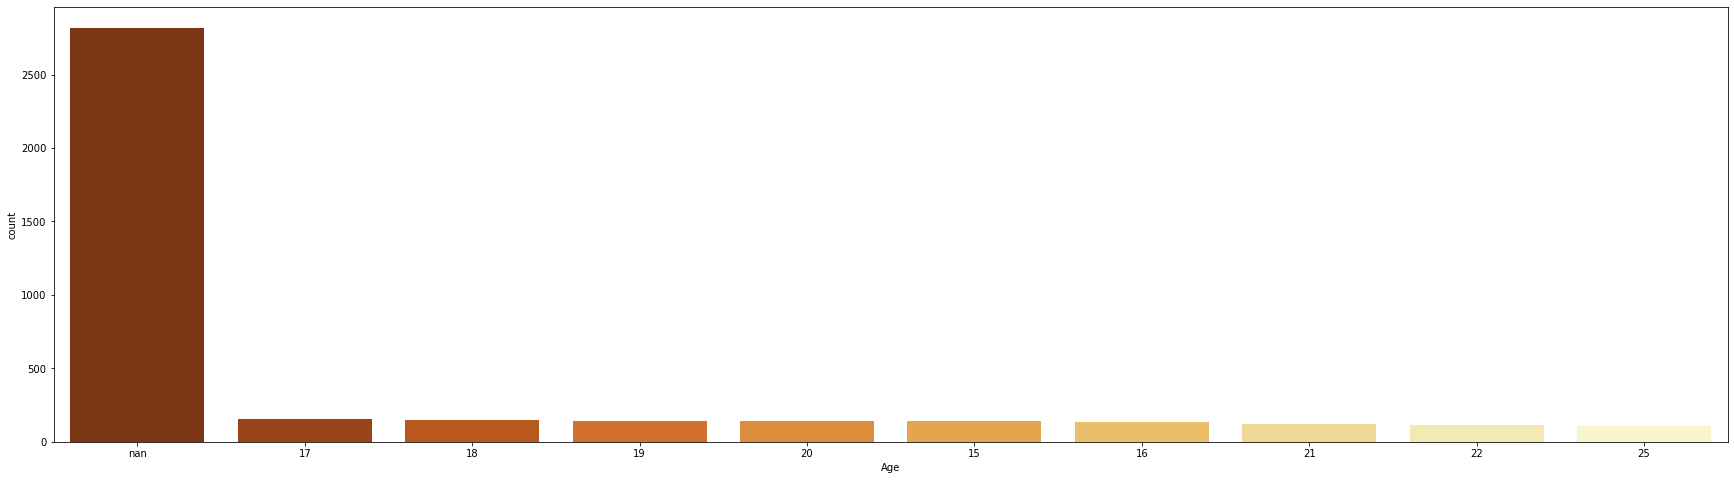

In [54]:
sns.countplot(x="Age", data=df, palette="YlOrBr_r",order=df.Age.value_counts().iloc[:10].index);

 ##### 2.4: Ataques entre sexos, ¿hay diferencia?

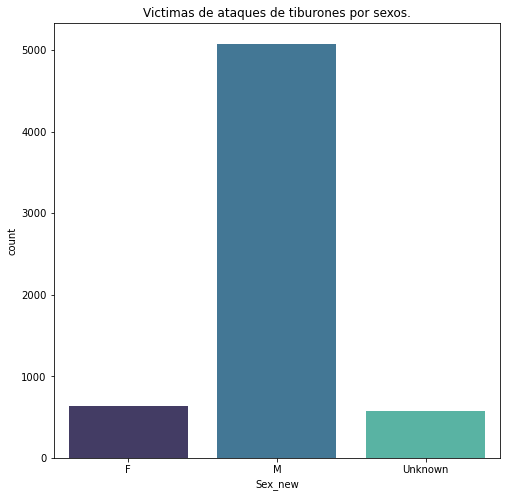

In [62]:
plt.figure(figsize=(8,8))
plt.title('Victimas de ataques de tiburones por sexos.')
sns.countplot(x="Sex_new", data=df, palette = 'mako');

<font color='cyan'> Vemos claramente que sí existe una gran diferencia en los ataques, siendo los hombres las principales víctimas.</font>

##### 2.5: ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.

<font color='red'> Esta columna es un cristo. Propongo extraer sólo los que tienen indicado el mes con tres letras (Ene, Feb, Mar...) que parece que son la mayoría y hacer la gráfica con eso.</font>

In [73]:
date = df['Date'].unique()

In [ ]:
meses = re.findall('\d-Jan-\b',date)

Patrones probados: '\b.{3}\b', [A-Za-z], "\b...\b", '\b\S{3}\b', "\\b[a-zA-Z]{3}\\b", 'Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec', '\d-Jan-\b'

In [ ]:
df[df.Date.str.contains("\\b[a-zA-Z]{3}\\b", regex= True, na=False)]